# Newsgroups on Classification Models

**For this project I will experiment with various classification models using subsets of some real-world data sets. In particular, I will use the K-Nearest-Neighbor algorithm to classify text documents, experiment with and compare classifiers that are part of the scikit-learn machine learning package for Python, and use some additional preprocessing capabilities of pandas and scikit-learn package**

## Question 1: KNN Classification on Newsgroups

**(1a) Create your own KNN classifier function. Your classifier should allow as input the training data matrix, the training labels, the instance to be classified, the value of K, and should return the predicted class for the instance and the indices of the top K neighbors. Your classifier should work with Euclidean distance as well as Cosine Similarity. You may create two separate classifiers, or add the distance metric as a parameter in the classifier function.**

In [714]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [849]:
#Load Dataset
train = pd.read_csv('trainClasses.txt', delimiter = '\t',header = None)
test  = pd.read_csv('testClasses.txt' , delimiter = '\t',header = None)
train_matrix = pd.read_csv('trainMatrixModified.txt', delimiter = '\t',header = None)
test_matrix  = pd.read_csv('testMatrixModified.txt', delimiter = '\t', header = None)
modified     = pd.read_csv('modifiedterms.txt', delimiter = '\t',header = None)

In [850]:
# Get Data Ready (Class Label) Selecting column label only
train_target = np.array(train.iloc[:,1])
test_target = np.array(test.iloc[:,1])

# Get data matrix Ready
train_matrixT = train_matrix.T
test_matrixT = test_matrix.T
train_matrixT.shape, test_matrixT.shape

((800, 5500), (200, 5500))

In [851]:
# Get data matrix Ready
train_matrixT_np = np.array(train_matrixT)
test_matrixT_np = np.array(test_matrixT)
type(train_matrixT_np) , test_matrixT_np.shape

(numpy.ndarray, (200, 5500))

**KNN Classifier**

In [852]:
import operator
def knn(x, D, labels, K,measure):
    """ find K nearest neighbors of an instance x among the instances in D """
    if measure == 0:
        # euclidean distances from the other points
        dists = np.sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1:
        # first find the vector norm for each instance in D as well as the norm for vector x
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        # Compute Cosine -> divide the dot product of x and each instance in D by the product of the two norms
        sims = np.dot(D,x)/(D_norm * x_norm)
        # The distance measure will be the inverse of Cosine similarity
        dists = 1 - sims
    idx = np.argsort(dists) # sorting
    #return the indexes of K nearest neighbors
    #return idx[:K], dists
    classCount={}
    for i in range(K):
        voteIlabel = labels[idx[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
        sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return idx[:K],sortedClassCount[0][0]

In [853]:
new_idx, predicted = knn(test_matrixT_np[5],train_matrixT_np, train_target,5,0)
print(new_idx)
print('Class:', predicted)

[554 757 798  38 711]
Class: 0


In [854]:
new_idx, predicted = knn(test_matrixT_np[5],train_matrixT_np, train_target,5,1)
print(new_idx)
print('Class:', predicted)

[425 149 779 651 438]
Class: 0


In [855]:
# Accuracy Function
    
def accuracy(label,x, D, train_target, K, measure):
    length_label = len(label)
    error = 0.0
    for i in range(length_label):
        newg_idx, pred = knn(x[i], D,train_target, K, measure)
        if (pred != label[i]): 
            error += 1.0
    accuracy = 1 - error/ float(length_label)
    return accuracy

**(1b) Create an evaluation function to measure the effectiveness of your classifier. This function will call the classifier function in part a on all the test instances and in each case compares the actual test class label to the predicted class label. It should take as input the training data, the training labels, the test instances, the labels for test instances, and the value of K. Your evaluation function should return three the Classification Accuracy (ratio of correct predictions to the number of test instances)**

In [856]:
EffAccru = accuracy(test_target, test_matrixT_np, train_matrixT_np, train_target, 5, 0)
print(EffAccru*100, "%")

81.5 %


In [857]:
EffAccru = accuracy(test_target, test_matrixT_np, train_matrixT_np, train_target, 5, 1)
print(EffAccru*100, "%")

97.0 %


**(1c) Run your evaluation function on a range of values for K in order to compare accuracy values for different numbers of neighbors. Do this both using Euclidean Distance as well as Cosine similarity measure. [For example, you can try evaluating your classifiers on a range of values of K from 1 through 20 (or greater)]. Present the results as graphs with K in the x-axis and the evaluation metric (accuracy) on the y-axis. Use a single plot to compare the two version of the classifier (Eculidean distanve version vs. cosine similarity version).**

In [858]:
list_euc = []
list_cosi = []

for i in range(0,20):
    euc = accuracy(test_target, test_matrixT_np, train_matrixT_np, train_target, i+1, 0) 
    cosi = accuracy(test_target, test_matrixT_np, train_matrixT_np, train_target, i+1, 1)
    list_euc.append(euc)
    list_cosi.append(cosi)
    
    print('K:',i+1,'Euc: %s '% euc,'cosi: %s' % cosi)

K: 1 Euc: 0.78  cosi: 0.985
K: 2 Euc: 0.78  cosi: 0.985
K: 3 Euc: 0.81  cosi: 0.97
K: 4 Euc: 0.81  cosi: 0.985
K: 5 Euc: 0.815  cosi: 0.97
K: 6 Euc: 0.835  cosi: 0.985
K: 7 Euc: 0.765  cosi: 0.98
K: 8 Euc: 0.8  cosi: 0.98
K: 9 Euc: 0.75  cosi: 0.975
K: 10 Euc: 0.85  cosi: 0.985
K: 11 Euc: 0.795  cosi: 0.98
K: 12 Euc: 0.845  cosi: 0.975
K: 13 Euc: 0.775  cosi: 0.98
K: 14 Euc: 0.815  cosi: 0.98
K: 15 Euc: 0.785  cosi: 0.985
K: 16 Euc: 0.8  cosi: 0.98
K: 17 Euc: 0.76  cosi: 0.975
K: 18 Euc: 0.785  cosi: 0.975
K: 19 Euc: 0.74  cosi: 0.975
K: 20 Euc: 0.765  cosi: 0.975


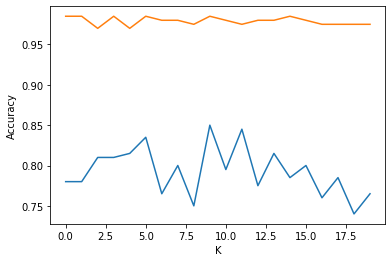

In [859]:
k = range(20)
plt.plot(list_euc, label='Euclidean')
plt.plot(list_cosi, label='Cosine')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

**(1d) Modify the training and test data sets so that term weights are converted to TFxIDF weights (instead of raw term frequencies). Then, rerun your evaluation (only for the Cosine similairty version of the classifier) on the range of K values (as above) and compare the results to the results without using TFxIDF weights.**

In [860]:
new_train_matrix = train_matrix

numTerms = new_train_matrix.shape[0]
NDocs = new_train_matrix.shape[1]
print(numTerms)
print(NDocs)

5500
800


In [861]:
#Find the doc count for each term
DF = np.array([(new_train_matrix!=0).sum(1)]).T
print(DF)
print('______________________________________')
# Create a matrix with all entries = NDocs
NMatrix=np.ones(np.shape(new_train_matrix), dtype=float)*NDocs
print(NMatrix)
print('______________________________________')
np.set_printoptions(precision=2,suppress=True,linewidth=120)

# Convert each entry into IDF values
# IDF is the log of the inverse of document frequency
# Note that IDF is only a function of the term, so all columns will be identical.

IDF = np.log2(np.divide(NMatrix, DF))
print(IDF)
print('______________________________________')

[[50]
 [ 7]
 [10]
 ...
 [ 2]
 [ 2]
 [ 2]]
______________________________________
[[800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 ...
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]]
______________________________________
[[4.   4.   4.   ... 4.   4.   4.  ]
 [6.84 6.84 6.84 ... 6.84 6.84 6.84]
 [6.32 6.32 6.32 ... 6.32 6.32 6.32]
 ...
 [8.64 8.64 8.64 ... 8.64 8.64 8.64]
 [8.64 8.64 8.64 ... 8.64 8.64 8.64]
 [8.64 8.64 8.64 ... 8.64 8.64 8.64]]
______________________________________


In [862]:
new_test_matrix  = test_matrix

# Finally compute the TFxIDF values for each document-term entry
TD_tfidf = (new_train_matrix*IDF).T
pd.set_option("display.precision", 2)
TD_tfidf

0      1      2     3      4      5     6      7     8     9     ...  \
0     8.0  13.67  12.64   0.0  23.11  27.86  7.89  32.71  9.78  8.03  ...   
1     0.0   0.00   0.00   0.0   2.89   0.00  0.00   0.00  0.00  0.00  ...   
2     0.0   0.00   0.00   0.0   0.00   0.00  0.00   8.18  0.00  2.01  ...   
3     8.0   0.00   0.00   0.0   0.00   0.00  0.00   0.00  0.00  0.00  ...   
4     8.0   0.00   0.00   0.0   0.00   0.00  0.00   0.00  0.00  0.00  ...   
..    ...    ...    ...   ...    ...    ...   ...    ...   ...   ...  ...   
795   0.0   0.00   0.00   0.0   0.00   0.00  0.00   0.00  0.00  0.00  ...   
796   0.0   0.00   0.00   0.0   0.00   0.00  0.00   0.00  0.00  0.00  ...   
797   0.0   0.00   0.00   0.0   0.00   0.00  0.00   0.00  0.00  0.00  ...   
798   0.0   0.00   0.00   0.0   0.00   0.00  0.00   0.00  0.00  0.00  ...   
799   0.0   0.00   0.00   0.0   2.89   0.00  0.00   0.00  0.00  0.00  ...   

     5490  5491  5492  5493  5494  5495  5496  5497  5498  5499  
0     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
795   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
796   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
797   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
798   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
799   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[800 rows x 5500 columns]

In [863]:
TD_tfidf2 = (new_test_matrix*IDF[:,0:200]).T
pd.set_option("display.precision", 2)
TD_tfidf2

0     1     2     3     4     5     6     7     8     9     ...  5490  \
0     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  2.01  ...  0.00   
1     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.00  ...  0.00   
2     4.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.00  ...  0.00   
3     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.00  ...  0.00   
4     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  2.01  ...  0.00   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
195   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  2.01  ...  8.64   
196   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.00  ...  0.00   
197   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.00  ...  0.00   
198   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  2.01  ...  0.00   
199   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.00  ...  0.00   

     5491  5492  5493  5494  5495  5496  5497  5498  5499  
0    0.00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1    0.00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2    0.00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3    0.00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4    0.00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...  
195  8.64   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
196  0.00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
197  0.00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
198  0.00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
199  0.00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[200 rows x 5500 columns]

In [864]:
# Train to np
a = TD_tfidf2.to_numpy()
# Test to np
b = TD_tfidf.to_numpy()

In [865]:
list_TFIDX = []
for i in range(0,20):
    TFIDX = accuracy(test_target, a, b, train_target, i+1, 1)
    list_TFIDX.append(TFIDX)
    print('K:',i+1,'TFIDX: %s '% TFIDX,'cosi: %s' % list_cosi[i])

K: 1 TFIDX: 0.945  cosi: 0.985
K: 2 TFIDX: 0.945  cosi: 0.985
K: 3 TFIDX: 0.98  cosi: 0.97
K: 4 TFIDX: 0.97  cosi: 0.985
K: 5 TFIDX: 0.98  cosi: 0.97
K: 6 TFIDX: 0.98  cosi: 0.985
K: 7 TFIDX: 0.985  cosi: 0.98
K: 8 TFIDX: 0.985  cosi: 0.98
K: 9 TFIDX: 0.99  cosi: 0.975
K: 10 TFIDX: 0.99  cosi: 0.985
K: 11 TFIDX: 0.99  cosi: 0.98
K: 12 TFIDX: 0.99  cosi: 0.975
K: 13 TFIDX: 0.99  cosi: 0.98
K: 14 TFIDX: 0.99  cosi: 0.98
K: 15 TFIDX: 0.99  cosi: 0.985
K: 16 TFIDX: 0.995  cosi: 0.98
K: 17 TFIDX: 0.99  cosi: 0.975
K: 18 TFIDX: 0.995  cosi: 0.975
K: 19 TFIDX: 0.995  cosi: 0.975
K: 20 TFIDX: 1.0  cosi: 0.975


**(1e) Create a new classifier based on the Rocchio Method adapted for text categorization. You should separate the training function from the classification function. The training part for the classifier can be implemented as a function that takes as input the training data matrix and the training labels, returning the prototype vectors for each class. The classification part can be implemented as another function that would take as input the prototypes returned from the training function and the instance to be classified. This function should measure Cosine similarity of the test instance to each prototype vector. Your output should indicate the predicted class for the test instance and the similarity values of the instance to each of the category prototypes. Finally, use your evaluation function to compare your results to the best KNN results you obtained earlier. [Note: your functions should work regardless of the number of categories (class labels) and should not be limited to two-class categorization scenario.]**

In [866]:
def rocchio_train(train, trainClass):
    model = []
    for i in set(trainClass):
        model.append(train[trainClass==i].sum(0))
    return model

In [867]:
vector = rocchio_train(b, train_target)

In [868]:
def rocchio_train(vector, x):
    m = -2
    simsList = []
    for i in range(len(vector)):
        D_norm = np.linalg.norm(vector[i])
        x_norm = np.linalg.norm(x)
        # Compute Cosine -> divide the dot product of x and each instance in D by the product of the two norms
        sims = np.dot(vector[i],x)/(D_norm * x_norm)
        simsList.append(sims)
        if sims > m:
            m = sims
            classPrediction = i
    return classPrediction, simsList

In [869]:
rocchio_train(vector, a[0])[0]

1

In [870]:
def accuracyRocchio(label,x, D, train_target,vector):
    length_label = len(label)
    error = 0.0
    for i in range(length_label):
        pred, sim = rocchio_train(vector, x[i])
        if (pred !=label[i]): 
            error += 1.0
    accuracy = 1 - error/ float(length_label)
    return accuracy

In [871]:
result = accuracyRocchio(test_target,a, b, train_target,vector)

In [872]:
print(result)

0.98


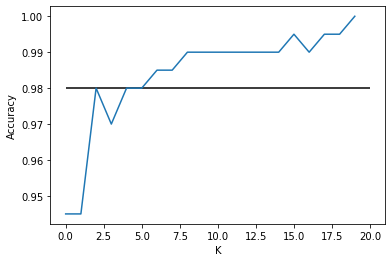

In [873]:
plt.hlines(result,0,20)
plt.plot(list_TFIDX, label='Cosine')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

**Analysis:** When accuracy is taken into account, the value are ranging from 94.5% to 99.5% in response to the experimentation of k = 1 to k = 20 while the value of accuracy in Rocchio Method is 98% which is relatively a little bit lower than the highest figure of the ealier result. With this evidence, it could be implied that the Rocchio algorithm might have some factor that fails to classify some multimodal classes and relationships but still worked out well with decent result.

## Qestion 2: Classification using scikit-learn

**(2a) Load and preprocess the data using Pandas or similar tools. Specifically, you need to separate the target attribute ("pep") from the portion of the data to be used for training and testing. you will need to convert the selected dataset into the Standard Spreadsheet format (scikit-learn functions generally assume that all attributes are in numeric form). Finally, you need to split the transformed data into training and test sets (using 80%-20% randomized split).**

In [739]:
BankData = pd.read_csv("http://facweb.cs.depaul.edu/mobasher/classes/csc478/Data/bank_data.csv")
BankData.head(5)

id  age   income  children  gender      region married  car  \
0  ID12101   48  17546.0         1  FEMALE  INNER_CITY      NO   NO   
1  ID12102   40  30085.1         3    MALE        TOWN     YES  YES   
2  ID12103   51  16575.4         0  FEMALE  INNER_CITY     YES  YES   
3  ID12104   23  20375.4         3  FEMALE        TOWN     YES   NO   
4  ID12105   57  50576.3         0  FEMALE       RURAL     YES   NO   

  savings_acct current_acct mortgage  pep  
0           NO           NO       NO  YES  
1           NO          YES      YES   NO  
2          YES          YES       NO   NO  
3           NO          YES       NO   NO  
4          YES           NO       NO   NO

In [740]:
BankData.shape

(600, 12)

In [741]:
BankData_rec = BankData[['id','age','income','children','gender','region','married','car','savings_acct','current_acct','mortgage']]
BankData_rec.head()

id  age   income  children  gender      region married  car  \
0  ID12101   48  17546.0         1  FEMALE  INNER_CITY      NO   NO   
1  ID12102   40  30085.1         3    MALE        TOWN     YES  YES   
2  ID12103   51  16575.4         0  FEMALE  INNER_CITY     YES  YES   
3  ID12104   23  20375.4         3  FEMALE        TOWN     YES   NO   
4  ID12105   57  50576.3         0  FEMALE       RURAL     YES   NO   

  savings_acct current_acct mortgage  
0           NO           NO       NO  
1           NO          YES      YES  
2          YES          YES       NO  
3           NO          YES       NO  
4          YES           NO       NO

In [742]:
BankData_target = BankData.pep
BankData_target.head()

0    YES
1     NO
2     NO
3     NO
4     NO
Name: pep, dtype: object

In [743]:
BankData_matrix = pd.get_dummies(BankData_rec[['age','income','children','gender','region','married','car','savings_acct','current_acct','mortgage']])
BankData_matrix.head()

age   income  children  gender_FEMALE  gender_MALE  region_INNER_CITY  \
0   48  17546.0         1              1            0                  1   
1   40  30085.1         3              0            1                  0   
2   51  16575.4         0              1            0                  1   
3   23  20375.4         3              1            0                  0   
4   57  50576.3         0              1            0                  0   

   region_RURAL  region_SUBURBAN  region_TOWN  married_NO  married_YES  \
0             0                0            0           1            0   
1             0                0            1           0            1   
2             0                0            0           0            1   
3             0                0            1           0            1   
4             1                0            0           0            1   

   car_NO  car_YES  savings_acct_NO  savings_acct_YES  current_acct_NO  \
0       1        0                1                 0                1   
1       0        1                1                 0                0   
2       0        1                0                 1                0   
3       1        0                1                 0                0   
4       1        0                0                 1                1   

   current_acct_YES  mortgage_NO  mortgage_YES  
0                 0            1             0  
1                 1            0             1  
2                 1            1             0  
3                 1            1             0  
4                 0            1             0

In [744]:
from sklearn.model_selection import train_test_split
Bank_train, Bank_test, Bank_target_train, Bank_target_test = train_test_split(BankData_matrix, BankData_target, test_size=0.2, random_state=99)

print(Bank_test.shape)
Bank_test.head(5)

(120, 19)


age   income  children  gender_FEMALE  gender_MALE  region_INNER_CITY  \
503   22  15308.2         0              1            0                  1   
32    45  23443.2         1              0            1                  0   
538   43  38784.0         0              1            0                  1   
3     23  20375.4         3              1            0                  0   
10    66  59803.9         0              1            0                  0   

     region_RURAL  region_SUBURBAN  region_TOWN  married_NO  married_YES  \
503             0                0            0           1            0   
32              0                1            0           0            1   
538             0                0            0           0            1   
3               0                0            1           0            1   
10              0                0            1           0            1   

     car_NO  car_YES  savings_acct_NO  savings_acct_YES  current_acct_NO  \
503       0        1                0                 1                0   
32        0        1                0                 1                0   
538       1        0                0                 1                0   
3         1        0                1                 0                0   
10        1        0                0                 1                0   

     current_acct_YES  mortgage_NO  mortgage_YES  
503                 1            0             1  
32                  1            1             0  
538                 1            1             0  
3                   1            1             0  
10                  1            1             0

In [745]:
print(Bank_train.shape)
Bank_train.head(5)

(480, 19)


age   income  children  gender_FEMALE  gender_MALE  region_INNER_CITY  \
409   23  11073.0         2              0            1                  0   
228   37  28021.6         0              0            1                  0   
2     51  16575.4         0              1            0                  1   
393   60  22053.2         2              1            0                  1   
4     57  50576.3         0              1            0                  0   

     region_RURAL  region_SUBURBAN  region_TOWN  married_NO  married_YES  \
409             0                1            0           0            1   
228             1                0            0           1            0   
2               0                0            0           0            1   
393             0                0            0           0            1   
4               1                0            0           0            1   

     car_NO  car_YES  savings_acct_NO  savings_acct_YES  current_acct_NO  \
409       1        0                0                 1                1   
228       0        1                1                 0                0   
2         0        1                0                 1                0   
393       0        1                0                 1                1   
4         1        0                0                 1                1   

     current_acct_YES  mortgage_NO  mortgage_YES  
409                 0            1             0  
228                 1            0             1  
2                   1            1             0  
393                 0            0             1  
4                   0            1             0

**(2b) Run scikit-learn's KNN classifier on the test set. Note: in the case of KNN, you should first normalize the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1). Generate the confusion matrix (visualize it using Matplotlib), as well as the classification report. Also, compute the average accuracy score. Experiment with different values of K and the weight parameter (i.e., with or without distance weighting) for KNN to see if you can improve accuracy (you do not need to provide the details of all of your experimentation, but provide a short discussion on what parameters worked best as well as your final results).**

**Perform min-max normalization to rescale numeric attributes**

In [746]:
from sklearn import preprocessing

In [747]:
min_max_scaler = preprocessing.MinMaxScaler().fit(Bank_train)

Bank_train_norm = min_max_scaler.transform(Bank_train)
Bank_train_norm = pd.DataFrame(Bank_train_norm, columns=Bank_train.columns, index=Bank_train.index)

Bank_test_norm = min_max_scaler.transform(Bank_test)
Bank_test_norm = pd.DataFrame(Bank_test_norm, columns=Bank_test.columns, index=Bank_test.index)

In [748]:
# np.set_printoptions(precision=2, linewidth=80, suppress=True)
Bank_train_norm.head()

age  income  children  gender_FEMALE  gender_MALE  region_INNER_CITY  \
409  0.10    0.09      0.67            0.0          1.0                0.0   
228  0.39    0.39      0.00            0.0          1.0                0.0   
2    0.67    0.19      0.00            1.0          0.0                1.0   
393  0.86    0.29      0.67            1.0          0.0                1.0   
4    0.80    0.80      0.00            1.0          0.0                0.0   

     region_RURAL  region_SUBURBAN  region_TOWN  married_NO  married_YES  \
409           0.0              1.0          0.0         0.0          1.0   
228           1.0              0.0          0.0         1.0          0.0   
2             0.0              0.0          0.0         0.0          1.0   
393           0.0              0.0          0.0         0.0          1.0   
4             1.0              0.0          0.0         0.0          1.0   

     car_NO  car_YES  savings_acct_NO  savings_acct_YES  current_acct_NO  \
409     1.0      0.0              0.0               1.0              1.0   
228     0.0      1.0              1.0               0.0              0.0   
2       0.0      1.0              0.0               1.0              0.0   
393     0.0      1.0              0.0               1.0              1.0   
4       1.0      0.0              0.0               1.0              1.0   

     current_acct_YES  mortgage_NO  mortgage_YES  
409               0.0          1.0           0.0  
228               1.0          0.0           1.0  
2                 1.0          1.0           0.0  
393               0.0          0.0           1.0  
4                 0.0          1.0           0.0

In [749]:
Bank_test_norm.head()

age  income  children  gender_FEMALE  gender_MALE  region_INNER_CITY  \
503  0.08    0.16      0.00            1.0          0.0                1.0   
32   0.55    0.31      0.33            0.0          1.0                0.0   
538  0.51    0.59      0.00            1.0          0.0                1.0   
3    0.10    0.25      1.00            1.0          0.0                0.0   
10   0.98    0.97      0.00            1.0          0.0                0.0   

     region_RURAL  region_SUBURBAN  region_TOWN  married_NO  married_YES  \
503           0.0              0.0          0.0         1.0          0.0   
32            0.0              1.0          0.0         0.0          1.0   
538           0.0              0.0          0.0         0.0          1.0   
3             0.0              0.0          1.0         0.0          1.0   
10            0.0              0.0          1.0         0.0          1.0   

     car_NO  car_YES  savings_acct_NO  savings_acct_YES  current_acct_NO  \
503     0.0      1.0              0.0               1.0              0.0   
32      0.0      1.0              0.0               1.0              0.0   
538     1.0      0.0              0.0               1.0              0.0   
3       1.0      0.0              1.0               0.0              0.0   
10      1.0      0.0              0.0               1.0              0.0   

     current_acct_YES  mortgage_NO  mortgage_YES  
503               1.0          0.0           1.0  
32                1.0          1.0           0.0  
538               1.0          1.0           0.0  
3                 1.0          1.0           0.0  
10                1.0          1.0           0.0

**KNN Classifier**

In [750]:
from sklearn import neighbors

In [751]:
n_neighbors = 5

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(Bank_train_norm, Bank_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [752]:
knnpreds_test = knnclf.predict(Bank_test_norm)
print(knnpreds_test)

['NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES'
 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO'
 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES'
 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO'
 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES'
 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO']


**Classification Report**

In [753]:
from sklearn.metrics import classification_report

In [754]:
print(classification_report(Bank_target_test, knnpreds_test))

              precision    recall  f1-score   support

          NO       0.73      0.70      0.71        66
         YES       0.65      0.69      0.67        54

    accuracy                           0.69       120
   macro avg       0.69      0.69      0.69       120
weighted avg       0.69      0.69      0.69       120



**Confusion Matrix**

In [755]:
from sklearn.metrics import confusion_matrix

In [756]:
knncm = confusion_matrix(Bank_target_test, knnpreds_test)
print(knncm)

[[46 20]
 [17 37]]


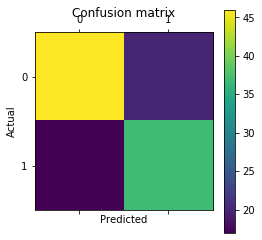

In [757]:
import pylab as plt
%matplotlib inline
plt.matshow(knncm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**The Average accuracy score across the test instance**

In [758]:
print(knnclf.score(Bank_test_norm, Bank_target_test))

0.6916666666666667


**The performance on the training data itself**

In [759]:
print(knnclf.score(Bank_train_norm, Bank_target_train))

1.0


**Try K = 9 with distance weighting**

In [760]:
n_neighbors = 9

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(Bank_train_norm, Bank_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='distance')

In [761]:
print(classification_report(Bank_target_test, knnpreds_test))

              precision    recall  f1-score   support

          NO       0.73      0.70      0.71        66
         YES       0.65      0.69      0.67        54

    accuracy                           0.69       120
   macro avg       0.69      0.69      0.69       120
weighted avg       0.69      0.69      0.69       120



In [762]:
print(knnclf.score(Bank_test_norm, Bank_target_test))

0.7416666666666667


**The average accuracy for k = 1 to k = 14 with distance weighting**

In [763]:
for n_neighbors in range(1,15):
    knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    knnclf.fit(Bank_train_norm, Bank_target_train)
    print(n_neighbors,'  :   ',knnclf.score(Bank_test_norm,Bank_target_test))

1   :    0.6333333333333333
2   :    0.6333333333333333
3   :    0.65
4   :    0.6583333333333333
5   :    0.6916666666666667
6   :    0.6583333333333333
7   :    0.7
8   :    0.725
9   :    0.7416666666666667
10   :    0.7333333333333333
11   :    0.7083333333333334
12   :    0.6916666666666667
13   :    0.6833333333333333
14   :    0.6666666666666666


**The average accuracy for k = 1 to k = 14 without distance weighting**

In [764]:
for n_neighbors in range(1,15):
    knnclf2 = neighbors.KNeighborsClassifier(n_neighbors)
    knnclf2.fit(Bank_train_norm, Bank_target_train)
    print(n_neighbors,'  :   ',knnclf2.score(Bank_test_norm,Bank_target_test))

1   :    0.6333333333333333
2   :    0.65
3   :    0.6166666666666667
4   :    0.6666666666666666
5   :    0.6333333333333333
6   :    0.6916666666666667
7   :    0.7
8   :    0.7333333333333333
9   :    0.7416666666666667
10   :    0.7416666666666667
11   :    0.7083333333333334
12   :    0.7083333333333334
13   :    0.6916666666666667
14   :    0.6666666666666666


**Discussion:** It can be seen that one of the issues that affect the performance of the kNN classifier is the choice of the hyperparameter k. If k is too small, the algorithm might be more sensitive to outliers. If k is too large, then the neighborhood may include too many points from other classes. As illustrated above the result varied by the number of K and the distsance weighting in this example did not make significant difference.

**(2c) Repeat the classification using scikit-learn's decision tree classifier (using the default parameters) and the Naive Bayes (Gaussian) classifier. As above, generate the confusion matrix, classification report, and average accuracy scores for each classifier. For each model, compare the average accuracry scores on the test and the training data sets. What does the comparison tell you in terms of bias-variance trade-off?**

In [765]:
from sklearn import tree, naive_bayes

**Decision Tree Classifier with default parameters**

In [766]:
treeclf = tree.DecisionTreeClassifier()
treeclf = treeclf.fit(Bank_train, Bank_target_train)
treepreds_test = treeclf.predict(Bank_test)
print(treepreds_test)

['NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES'
 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO'
 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO'
 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES'
 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES'
 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO']


In [767]:
#Accuracy for test set
print(treeclf.score(Bank_test, Bank_target_test))
print('____________________')
#Accuracy for train set
print(treeclf.score(Bank_train, Bank_target_train))

0.8083333333333333
____________________
1.0


In [768]:
print(classification_report(Bank_target_test, treepreds_test))

              precision    recall  f1-score   support

          NO       0.83      0.82      0.82        66
         YES       0.78      0.80      0.79        54

    accuracy                           0.81       120
   macro avg       0.81      0.81      0.81       120
weighted avg       0.81      0.81      0.81       120



In [769]:
treecm = confusion_matrix(Bank_target_test, treepreds_test, labels=['YES','NO'])
print(treecm)

[[43 11]
 [12 54]]


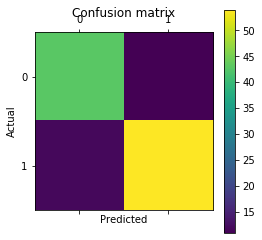

In [770]:
plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Naive Bayes Classifier**

In [771]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(Bank_train, Bank_target_train)
nbpreds_test = nbclf.predict(Bank_test)
print(nbpreds_test)

['NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES'
 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES'
 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO'
 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES'
 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES']


In [772]:
print(nbclf.score(Bank_train, Bank_target_train))

0.6375


In [773]:
print(nbclf.score(Bank_test, Bank_target_test))

0.7333333333333333


In [774]:
print(classification_report(Bank_target_test, treepreds_test))

              precision    recall  f1-score   support

          NO       0.83      0.82      0.82        66
         YES       0.78      0.80      0.79        54

    accuracy                           0.81       120
   macro avg       0.81      0.81      0.81       120
weighted avg       0.81      0.81      0.81       120



In [775]:
nbcm = confusion_matrix(Bank_target_test, nbpreds_test, labels=['YES','NO'])
print(nbcm)

[[32 22]
 [10 56]]


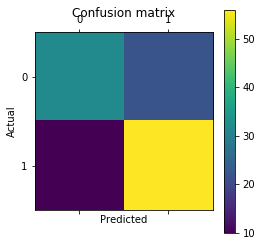

In [776]:
plt.matshow(nbcm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**For each model, compare the average accuracry scores on the test and the training data sets. What does the comparison tell you in terms of bias-variance trade-off?**

In the Decistion Tree classification, the score show 100% prediction accuracy on the train set and indicates 88% on the test set, which can be implied that the decision tree has high variance low bias algorithm that is accurate on average but might be inconsistent. Low bias tends to be conmplex with flexible structure, however, DT csn be pruned to reduce the complexity. On the other hand, for the Naive Bayes classifier, test score is 73% while train score is 63%. This tends to be high bias low variance algorithm that is consistent but in accurate on average, this low varaiance algorithm tend to be less complex leading to underfit model.

## Question 3: Data Analysis and Predictive Modeling on Census data

**(a) Preprocessing and data analysis:**

- Examine the data for missing values. In case of categorical attributes, remove instances with missing values. In the case of numeric attributes, impute and fill-in the missing values using the attribute mean.
- Examine the characteristics of the attributes, including relevant statistics for each attribute, histograms illustrating the distribtions of numeric attributes, bar graphs showing value counts for categorical attributes, etc.
- Perform the following cross-tabulations (including generating bar charts): education+race, work-class+income, work-class+race, and race+income. In the latter case (race+income) also create a table or chart showing percentages of each race category that fall in the low-income group. Discuss your observations from this analysis.
- Compare and contrast the characteristics of the low-income and high-income categories across the different attributes.

In [822]:
AdultMo = pd.read_csv("http://facweb.cs.depaul.edu/mobasher/classes/csc478/Data/adult-modified.csv", na_values=["?"])
AdultMo.head(5)

age workclass  education marital-status   race     sex  hours-per-week  \
0  39.0    Public         13         Single  White    Male              40   
1  50.0  Self-emp         13        Married  White    Male              13   
2  38.0   Private          9         Single  White    Male              40   
3  53.0   Private          7        Married  Black    Male              40   
4  28.0   Private         13        Married  Black  Female              40   

  income  
0  <=50K  
1  <=50K  
2  <=50K  
3  <=50K  
4  <=50K

In [823]:
AdultMo.shape

(10000, 8)

In [824]:
AdultMo[AdultMo.isnull().any(axis=1)]

age workclass  education marital-status         race     sex  \
19     NaN  Self-emp         14         Single        White  Female   
27     NaN       NaN         10        Married        Asian    Male   
40     NaN   Private          5        Married        White    Male   
61    32.0       NaN          4        Married        White    Male   
65     NaN   Private          9        Married        White    Male   
...    ...       ...        ...            ...          ...     ...   
9965   NaN   Private         10        Married  Amer-Indian  Female   
9966   NaN   Private         13        Married        White    Male   
9987  67.0       NaN          4        Married        White    Male   
9993   NaN   Private          9        Married        White  Female   
9998   NaN   Private          2        Married        White    Male   

      hours-per-week income  
19                45   >50K  
27                60   >50K  
40                43  <=50K  
61                40  <=50K  
65                40  <=50K  
...              ...    ...  
9965              40  <=50K  
9966              50   >50K  
9987              40  <=50K  
9993              15  <=50K  
9998              53  <=50K  

[777 rows x 8 columns]

In [825]:
AdultMo.isnull().sum()

age               198
workclass         588
education           0
marital-status      0
race                0
sex                 0
hours-per-week      0
income              0
dtype: int64

**For numeric attributes, impute and fill-in the missing values using the attribute mean**

In [826]:
AdultMo[AdultMo.age.isnull()]

age workclass  education marital-status         race     sex  \
19    NaN  Self-emp         14         Single        White  Female   
27    NaN       NaN         10        Married        Asian    Male   
40    NaN   Private          5        Married        White    Male   
65    NaN   Private          9        Married        White    Male   
80    NaN   Private          9         Single        White    Male   
...   ...       ...        ...            ...          ...     ...   
9944  NaN   Private         12         Single        White  Female   
9965  NaN   Private         10        Married  Amer-Indian  Female   
9966  NaN   Private         13        Married        White    Male   
9993  NaN   Private          9        Married        White  Female   
9998  NaN   Private          2        Married        White    Male   

      hours-per-week income  
19                45   >50K  
27                60   >50K  
40                43  <=50K  
65                40  <=50K  
80                30  <=50K  
...              ...    ...  
9944              45  <=50K  
9965              40  <=50K  
9966              50   >50K  
9993              15  <=50K  
9998              53  <=50K  

[198 rows x 8 columns]

In [827]:
age_mean = AdultMo.age.mean()
print(age_mean)

38.449806162007754


In [828]:
AdultMo.age.fillna(age_mean, axis=0, inplace=True)
AdultMo.isnull().sum()

age                 0
workclass         588
education           0
marital-status      0
race                0
sex                 0
hours-per-week      0
income              0
dtype: int64

**For categorical attributes, remove instances with missing values**

In [829]:
AdultMo[AdultMo.workclass.isnull()]

age workclass  education marital-status   race     sex  \
27    38.45       NaN         10        Married  Asian    Male   
61    32.00       NaN          4        Married  White    Male   
69    25.00       NaN         10         Single  White    Male   
77    67.00       NaN          6        Married  White    Male   
106   17.00       NaN          6         Single  White  Female   
...     ...       ...        ...            ...    ...     ...   
9907  68.00       NaN          9        Married  White    Male   
9926  73.00       NaN          7        Married  White    Male   
9927  18.00       NaN          7         Single  White  Female   
9938  36.00       NaN         10         Single  White  Female   
9987  67.00       NaN          4        Married  White    Male   

      hours-per-week income  
27                60   >50K  
61                40  <=50K  
69                40  <=50K  
77                 2  <=50K  
106               32  <=50K  
...              ...    ...  
9907              15  <=50K  
9926               8  <=50K  
9927              20  <=50K  
9938              25  <=50K  
9987              40  <=50K  

[588 rows x 8 columns]

In [830]:
AdultMo.dropna(axis=0, inplace=True)
print(AdultMo.isnull().sum())
print(AdultMo.shape)

age               0
workclass         0
education         0
marital-status    0
race              0
sex               0
hours-per-week    0
income            0
dtype: int64
(9412, 8)


In [786]:
AdultMo.describe()

age  education  hours-per-week
count  9412.00    9412.00         9412.00
mean     38.37      10.13           41.08
std      12.96       2.54           11.88
min      17.00       1.00            1.00
25%      28.00       9.00           40.00
50%      37.00      10.00           40.00
75%      47.00      13.00           45.00
max      90.00      16.00           99.00

**Examine the characteristics of the attributes, including relevant statistics for each attribute**

In [787]:
AdultMo[["age","education","hours-per-week"]].corr()

age  education  hours-per-week
age             1.00       0.03            0.10
education       0.03       1.00            0.14
hours-per-week  0.10       0.14            1.00

 **Histograms illustrating the distribtions of numeric attributes**

In [831]:
import matplotlib.pyplot as plt

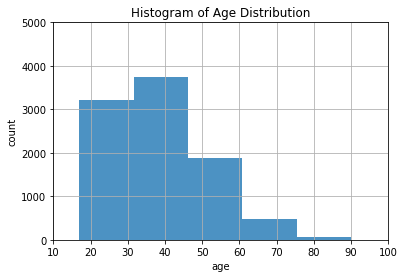

In [832]:
plt.hist(AdultMo["age"], bins=5, alpha=0.8)
plt.xlabel('age')
plt.ylabel('count')
plt.title('Histogram of Age Distribution')
plt.axis([10,100,0,5000])
plt.grid(True)

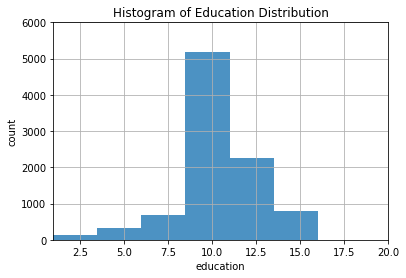

In [833]:
plt.hist(AdultMo["education"], bins=6, alpha=0.8)
plt.xlabel('education')
plt.ylabel('count')
plt.title('Histogram of Education Distribution')
plt.axis([1,20,0,6000])
plt.grid(True)

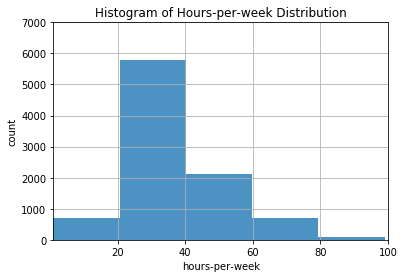

In [834]:
plt.hist(AdultMo["hours-per-week"], bins=5, alpha=0.8)
plt.xlabel('hours-per-week')
plt.ylabel('count')
plt.title('Histogram of Hours-per-week Distribution')
plt.axis([1,100,0,7000])
plt.grid(True)

**Bar graphs showing value counts for categorical attributes**

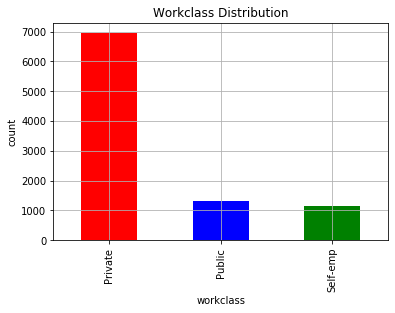

In [835]:
temp1 = AdultMo['workclass'].value_counts()
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.set_xlabel('workclass')
ax1.set_ylabel('count')
ax1.set_title("Workclass Distribution")
temp1.plot(kind='bar', grid = True, color=["r", "b", "g", "m"])

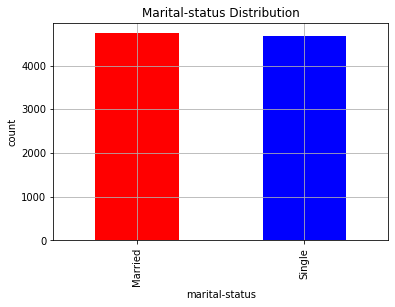

In [836]:
temp2 = AdultMo['marital-status'].value_counts()
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.set_xlabel('marital-status')
ax1.set_ylabel('count')
ax1.set_title("Marital-status Distribution")
temp2.plot(kind='bar', grid = True, color=["r", "b", "g", "m"])

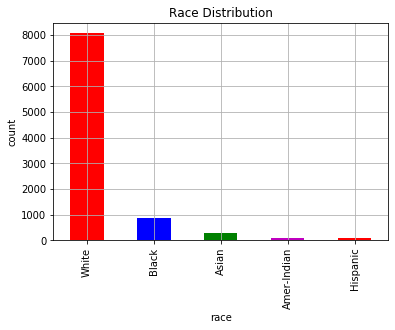

In [837]:
temp3 = AdultMo['race'].value_counts()
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.set_xlabel('race')
ax1.set_ylabel('count')
ax1.set_title("Race Distribution")
temp3.plot(kind='bar', grid = True, color=["r", "b", "g", "m"])

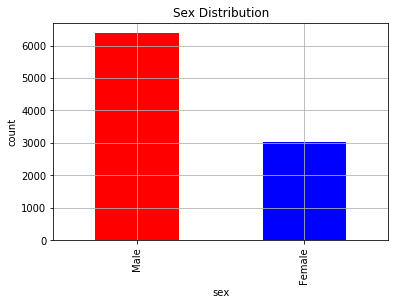

In [838]:
temp4 = AdultMo['sex'].value_counts()
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.set_xlabel('sex')
ax1.set_ylabel('count')
ax1.set_title("Sex Distribution")
temp4.plot(kind='bar', grid = True, color=["r", "b", "g", "m"])

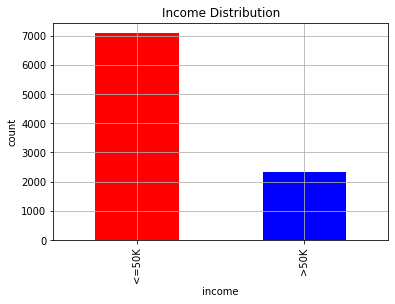

In [839]:
temp5 = AdultMo['income'].value_counts()
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.set_xlabel('income')
ax1.set_ylabel('count')
ax1.set_title("Income Distribution")
temp5.plot(kind='bar', grid = True, color=["r", "b", "g", "m"])

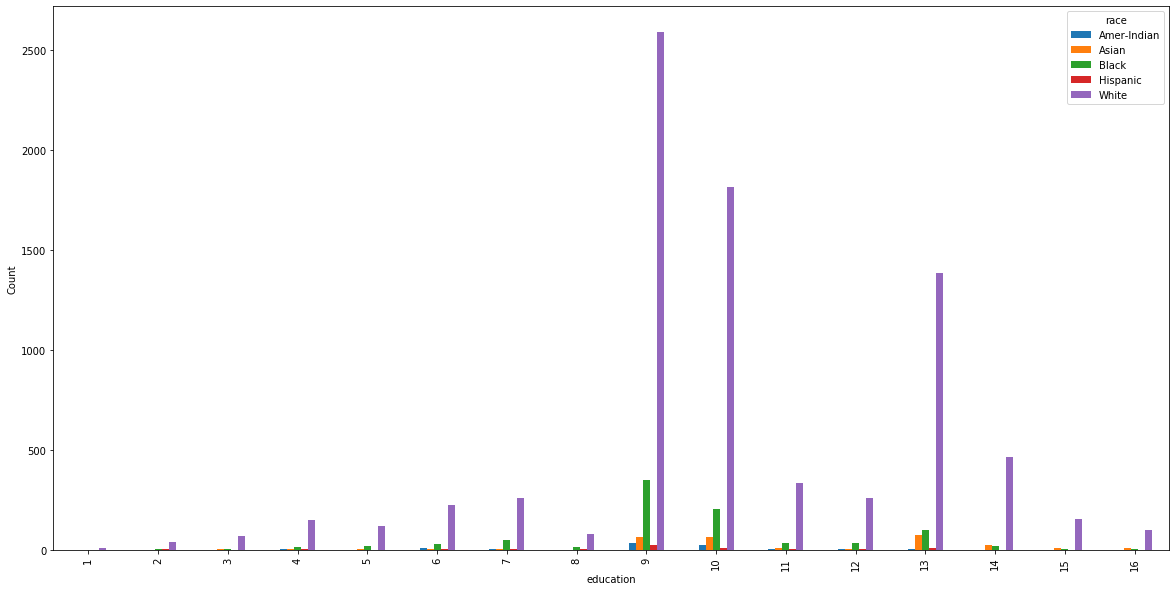

In [840]:
#Crosstabulation for education + race
plot1 = pd.crosstab(AdultMo['education'],AdultMo['race']).plot(kind = 'bar', figsize=(20,10))
plot1.set_ylabel("Count")
plt.show(plot1)

Each race groups follows similar distrubition, with the peak at 9-10 unit for education. Education of 8, 11 and 12 units seems to fluctuate a little. Perhaps 13 is the number of years of education for people taking Master's degree whereas 9-10 is bachelor's. The American-Indian group does not seem to have this bimodal trend but total number is very low to make inferences.

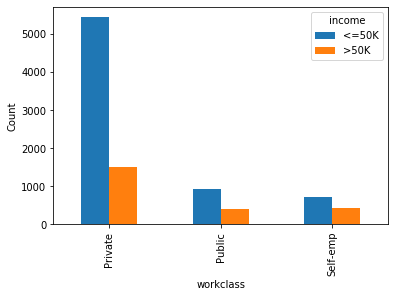

In [841]:
#Crosstabulation for workclass+income
plot2 = pd.crosstab(AdultMo['workclass'],AdultMo['income']).plot(kind = 'bar')
plot2.set_ylabel("Count")
plt.show(plot2)

The number of high income people to low income people is comparatively larger as moving from private to public and self-employed but proprotionally, self-employed are likely to have high income with respect to all workclass.

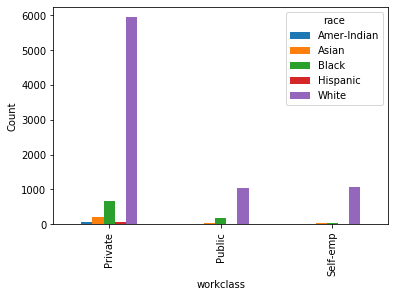

In [842]:
#Crosstabulation for workclass+race
plot3 = pd.crosstab(AdultMo['workclass'],AdultMo['race']).plot(kind = 'bar')
plot3.set_ylabel("Count")
plt.show(plot3)

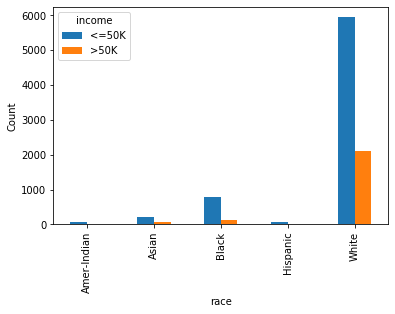

In [843]:
#Crosstabulation for race+income
plot4 = pd.crosstab(AdultMo['race'],AdultMo['income']).plot(kind = 'bar')
plot4.set_ylabel("Count")
plt.show(plot4)

In [848]:
#Table or chart showing percentages of each race category that fall in the low-income group
pd.crosstab(AdultMo['income'],AdultMo['race'])/AdultMo.shape[0]*100

race    Amer-Indian  Asian  Black  Hispanic  White
income                                            
<=50K          0.88   2.38   8.21      0.73  63.15
>50K           0.10   0.71   1.26      0.06  22.50

**Discuss your observations from this analysis**
Overall with respect to the low income group, white people carry the highest percentage among all races. The lowest portion belongs to Hispanic race which appears to be a bit lesser than Amer-Indian race. In addiion, amount of black people have almost 4 time greater than Asian who positions in the third rank in the group of low income.

**Compare and contrast the characteristics of the low-income and high-income categories across the different attributes**

In [802]:
#Compare income to another categories 
pd.crosstab(AdultMo['income'],AdultMo['workclass'])/AdultMo.shape[0]*100

workclass  Private  Public  Self-emp
income                              
<=50K        57.83    9.83      7.70
>50K         15.98    4.16      4.49

In [803]:
pd.crosstab(AdultMo['income'],AdultMo['sex'])/AdultMo.shape[0]*100

sex     Female   Male
income               
<=50K    28.36  47.00
>50K      3.82  20.81

In [804]:
pd.crosstab(AdultMo['income'],AdultMo['marital-status'])/AdultMo.shape[0]*100

marital-status  Married  Single
income                         
<=50K             29.01   46.36
>50K              21.32    3.31

**Categorial Variables**

**income by workclass:** discussed above in the previous answer.

**Income by sex:** The ratio of female with high income to low income is smaller than the ratio of the male group.

**Income by marital-status:** The married couples seems to have similar quantity of high and low income portions with minimal difference of less than 8%, while it significantly shows greater size of low-income in single population.

Text(0.5, 0.98, 'Income by education')

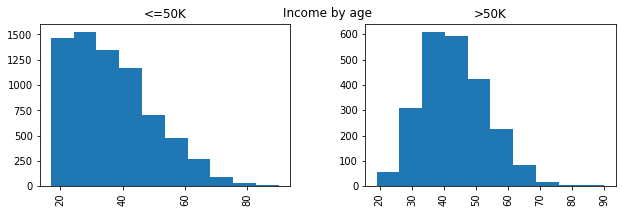

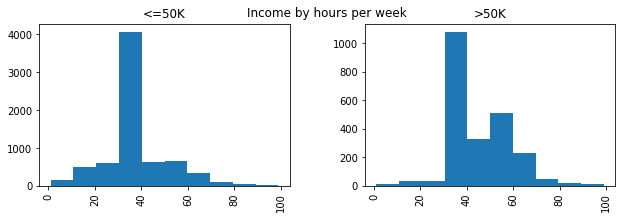

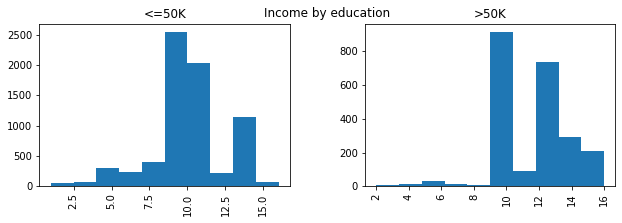

In [805]:
# Numeric Variables
AdultMo[['income','age']].hist(by=AdultMo['income'],figsize=(10,3))
plt.suptitle('Income by age')
AdultMo[['income','hours-per-week']].hist(by=AdultMo['income'],figsize=(10,3))
plt.suptitle('Income by hours per week')
AdultMo[['income','education']].hist(by=AdultMo['income'],figsize=(10,3))
plt.suptitle('Income by education')

**Numeric Attributes comparing low vs high**
    
**Income by age:** It appears to be rigth skewed vs centered in lower and higher income respectively. Low income has more younger people. High income has central tendancy of 35-45 years.
    
**Income by hours per week:** Univariate vs bivariate. The low income has number of hours centered at 30-40. The high income has the same peak but with wider spread towards more number of hours.
    
**Income by education:** These are comparable bimodal distribution, it is noticed that the graph has two distinct peaks, with a valley separating them. Of <=50K income, peaks are at 8.5 and 13.5 unit-by education but they are at 9 and 12.5 unit-education in a group of >50K income. 

**(b) Predictive Modeling and Model Evaluation**

- Using either Pandas or Scikit-learn, create dummy variables for the categorical attributes. Then separate the target attribute ("income_>50K") from the attributes used for training. [Note: you need to drop "income_<=50K" which is also created as a dummy variable in earlier steps).
- Use scikit-learn to build classifiers uisng Naive Bayes (Gaussian), decision tree (using "entropy" as selection criteria), and linear discriminant analysis (LDA). For each of these perform 10-fold cross-validation (using cross-validation module in scikit-learn) and report the overall average accuracy.
- For the decision tree model (generated on the full training data), generate a visualization of tree and submit it as a separate file (png, jpg, or pdf) or embed it in the Jupyter Notebook.


In [806]:
AdultMo2 = pd.get_dummies(AdultMo)
AdultMo2.head(10)

age  education  hours-per-week  workclass_Private  workclass_Public  \
0  39.0         13              40                  0                 1   
1  50.0         13              13                  0                 0   
2  38.0          9              40                  1                 0   
3  53.0          7              40                  1                 0   
4  28.0         13              40                  1                 0   
5  37.0         14              40                  1                 0   
6  49.0          5              16                  1                 0   
7  52.0          9              45                  0                 0   
8  31.0         14              50                  1                 0   
9  42.0         13              40                  1                 0   

   workclass_Self-emp  marital-status_Married  marital-status_Single  \
0                   0                       0                      1   
1                   1                       1                      0   
2                   0                       0                      1   
3                   0                       1                      0   
4                   0                       1                      0   
5                   0                       1                      0   
6                   0                       1                      0   
7                   1                       1                      0   
8                   0                       0                      1   
9                   0                       1                      0   

   race_Amer-Indian  race_Asian  race_Black  race_Hispanic  race_White  \
0                 0           0           0              0           1   
1                 0           0           0              0           1   
2                 0           0           0              0           1   
3                 0           0           1              0           0   
4                 0           0           1              0           0   
5                 0           0           0              0           1   
6                 0           0           1              0           0   
7                 0           0           0              0           1   
8                 0           0           0              0           1   
9                 0           0           0              0           1   

   sex_Female  sex_Male  income_<=50K  income_>50K  
0           0         1             1            0  
1           0         1             1            0  
2           0         1             1            0  
3           0         1             1            0  
4           1         0             1            0  
5           1         0             1            0  
6           1         0             1            0  
7           0         1             0            1  
8           1         0             0            1  
9           0         1             0            1

In [807]:
# drop columns that income lower that 50k
AdultMo3 = AdultMo2.drop(columns = ['income_<=50K'], axis = 1)
AdultMo3.head()

age  education  hours-per-week  workclass_Private  workclass_Public  \
0  39.0         13              40                  0                 1   
1  50.0         13              13                  0                 0   
2  38.0          9              40                  1                 0   
3  53.0          7              40                  1                 0   
4  28.0         13              40                  1                 0   

   workclass_Self-emp  marital-status_Married  marital-status_Single  \
0                   0                       0                      1   
1                   1                       1                      0   
2                   0                       0                      1   
3                   0                       1                      0   
4                   0                       1                      0   

   race_Amer-Indian  race_Asian  race_Black  race_Hispanic  race_White  \
0                 0           0           0              0           1   
1                 0           0           0              0           1   
2                 0           0           0              0           1   
3                 0           0           1              0           0   
4                 0           0           1              0           0   

   sex_Female  sex_Male  income_>50K  
0           0         1            0  
1           0         1            0  
2           0         1            0  
3           0         1            0  
4           1         0            0

In [808]:
# Target variable
AdultMo_target = AdultMo3['income_>50K']
AdultMo_target.head(15)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     1
9     1
10    1
11    1
12    0
13    0
14    1
Name: income_>50K, dtype: uint8

In [809]:
# Attribute variable
AdultMo_attri = AdultMo3[['age', 'education', 'hours-per-week', 'workclass_Private',
       'workclass_Public', 'workclass_Self-emp', 'marital-status_Married',
       'marital-status_Single', 'race_Amer-Indian', 'race_Asian', 'race_Black',
       'race_Hispanic', 'race_White', 'sex_Female', 'sex_Male']]
AdultMo_attri.head()

age  education  hours-per-week  workclass_Private  workclass_Public  \
0  39.0         13              40                  0                 1   
1  50.0         13              13                  0                 0   
2  38.0          9              40                  1                 0   
3  53.0          7              40                  1                 0   
4  28.0         13              40                  1                 0   

   workclass_Self-emp  marital-status_Married  marital-status_Single  \
0                   0                       0                      1   
1                   1                       1                      0   
2                   0                       0                      1   
3                   0                       1                      0   
4                   0                       1                      0   

   race_Amer-Indian  race_Asian  race_Black  race_Hispanic  race_White  \
0                 0           0           0              0           1   
1                 0           0           0              0           1   
2                 0           0           0              0           1   
3                 0           0           1              0           0   
4                 0           0           1              0           0   

   sex_Female  sex_Male  
0           0         1  
1           0         1  
2           0         1  
3           0         1  
4           1         0

In [810]:
AdultMo_train, AdultMo_test, AdultMo_target_train, AdultMo_target_test = train_test_split(AdultMo_attri, AdultMo_target, test_size=0.2, random_state=99)

print (AdultMo_test.shape)
AdultMo_test[0:5]

(1883, 15)


age  education  hours-per-week  workclass_Private  workclass_Public  \
7642  62.0          9              40                  1                 0   
6898  53.0          6              99                  0                 0   
6180  71.0         15               2                  0                 0   
1679  32.0          9              40                  1                 0   
5534  39.0         10              75                  1                 0   

      workclass_Self-emp  marital-status_Married  marital-status_Single  \
7642                   0                       1                      0   
6898                   1                       1                      0   
6180                   1                       1                      0   
1679                   0                       1                      0   
5534                   0                       0                      1   

      race_Amer-Indian  race_Asian  race_Black  race_Hispanic  race_White  \
7642                 0           0           0              0           1   
6898                 0           0           0              0           1   
6180                 0           0           0              0           1   
1679                 0           0           0              0           1   
5534                 0           0           0              0           1   

      sex_Female  sex_Male  
7642           1         0  
6898           0         1  
6180           0         1  
1679           0         1  
5534           1         0

In [811]:
print (AdultMo_train.shape)
AdultMo_train[0:5]

(7529, 15)


age  education  hours-per-week  workclass_Private  workclass_Public  \
3782  66.0          9              20                  0                 0   
9383  28.0         13              65                  1                 0   
2148  31.0         13              40                  0                 1   
5289  36.0          6              40                  1                 0   
2396  53.0         14              54                  1                 0   

      workclass_Self-emp  marital-status_Married  marital-status_Single  \
3782                   1                       1                      0   
9383                   0                       0                      1   
2148                   0                       0                      1   
5289                   0                       1                      0   
2396                   0                       0                      1   

      race_Amer-Indian  race_Asian  race_Black  race_Hispanic  race_White  \
3782                 0           0           0              0           1   
9383                 0           0           0              0           1   
2148                 0           0           0              0           1   
5289                 0           0           0              0           1   
2396                 0           0           0              0           1   

      sex_Female  sex_Male  
3782           0         1  
9383           0         1  
2148           0         1  
5289           0         1  
2396           1         0

**Perform min-max normalization to rescale numeric attribute**

In [812]:
min_max_scaler = preprocessing.MinMaxScaler().fit(AdultMo_train)
AdultMo_train_norm = min_max_scaler.transform(AdultMo_train)
AdultMo_test_norm = min_max_scaler.transform(AdultMo_test)

np.set_printoptions(precision=2, linewidth=80, suppress=True)
AdultMo_train_norm[0:5]

array([[0.67, 0.53, 0.19, 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 1.  , 0.  , 1.  ],
       [0.15, 0.8 , 0.65, 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
        0.  , 1.  , 0.  , 1.  ],
       [0.19, 0.8 , 0.39, 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
        0.  , 1.  , 0.  , 1.  ],
       [0.26, 0.33, 0.39, 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 1.  , 0.  , 1.  ],
       [0.49, 0.87, 0.54, 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
        0.  , 1.  , 1.  , 0.  ]])

In [813]:
AdultMo_test_norm[0:5]

array([[0.62, 0.53, 0.39, 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 1.  , 1.  , 0.  ],
       [0.49, 0.33, 1.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 1.  , 0.  , 1.  ],
       [0.74, 0.93, 0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 1.  , 0.  , 1.  ],
       [0.21, 0.53, 0.39, 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 1.  , 0.  , 1.  ],
       [0.3 , 0.6 , 0.75, 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
        0.  , 1.  , 1.  , 0.  ]])

In [814]:
from sklearn.tree import export_graphviz
from sklearn import model_selection
from sklearn import naive_bayes
from sklearn.model_selection import cross_val_score

**Naive Bayes Gaussian**

In [815]:
nbclf = naive_bayes.GaussianNB()
cv_scores = model_selection.cross_val_score(nbclf, AdultMo_train, AdultMo_target_train, cv=10)
print (cv_scores)
print("Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

nbclf = nbclf.fit(AdultMo_train, AdultMo_target_train)
print ("Accuracy on Training: ",  nbclf.score(AdultMo_train, AdultMo_target_train))

[0.71 0.72 0.73 0.72 0.71 0.72 0.74 0.72 0.7  0.73]
Overall Accuracy on X-Val: 0.72 (+/- 0.02)
Accuracy on Training:  0.7213441360074379


**Linear discriminant analysis**

In [816]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ldclf = LinearDiscriminantAnalysis()
cv_scores = model_selection.cross_val_score(ldclf, AdultMo_train, AdultMo_target_train, cv=10)
print (cv_scores)
print("Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

ldclf = ldclf.fit(AdultMo_train, AdultMo_target_train)
print ("Accuracy on Training: ",  ldclf.score(AdultMo_train, AdultMo_target_train))

[0.81 0.81 0.8  0.8  0.81 0.81 0.82 0.81 0.8  0.81]
Overall Accuracy on X-Val: 0.81 (+/- 0.01)
Accuracy on Training:  0.8084739009164563


/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/anaconda3/lib/pyt

**Decision Tree**

In [817]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy')
cv_scores = model_selection.cross_val_score(treeclf, AdultMo_train, AdultMo_target_train, cv=5)
print (cv_scores)
print("Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

treeclf = treeclf.fit(AdultMo_train, AdultMo_target_train)
print ("Accuracy on Training: ",  treeclf.score(AdultMo_train, AdultMo_target_train))

[0.77 0.75 0.78 0.78 0.75]
Overall Accuracy on X-Val: 0.77 (+/- 0.03)
Accuracy on Training:  0.9438172400053128


In [818]:
#conda install -c conda-forge/label/broken python-graphviz

In [819]:
from sklearn.tree import export_graphviz
export_graphviz(treeclf, out_file='tree.dot', feature_names=AdultMo_train.columns)

import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [820]:
system(dot -Tpng tree.dot -o dtree.png)

['dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.463059 to fit']

In [821]:
from IPython.display import Image
Image(filename='dtree.png', width=800)